In [6]:
import time
import psutil
import numpy as np
import matplotlib.pyplot as plt
# To see the animations 
# pip install "notebook<7"
import time

In [7]:
# %matplotlib notebook 
# plt.rcParams['animation.html'] = 'jshtml'

%matplotlib widget


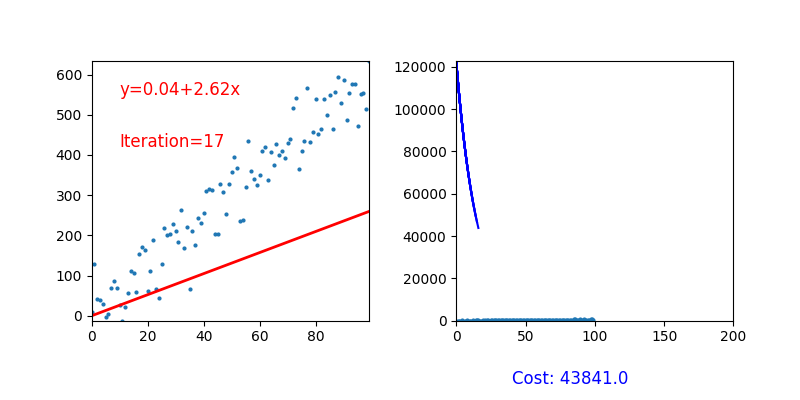

In [8]:
# Let us create some random data
data_size=100

mu, sigma = 1, 50 # mean and standard deviation
error=np.random.normal(mu, sigma, data_size)

x = np.arange(0 ,  data_size )
y = (6 * x) + error

plt.plot(x, y, 'o', markersize=2)

plt.show()

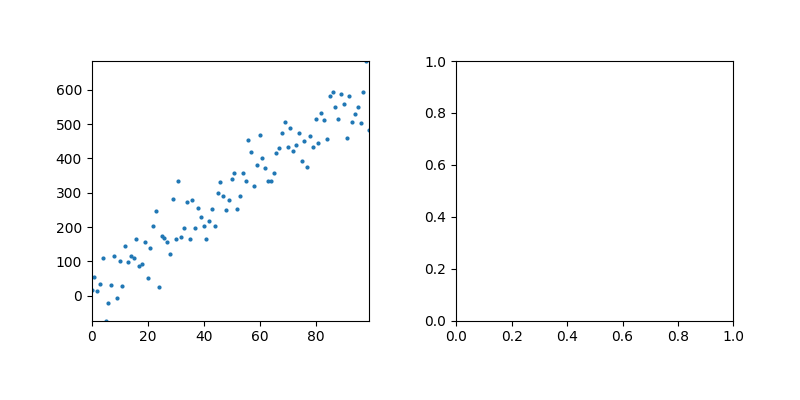

In [9]:
###### fig = plt.figure()
fig=plt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')

# first subfigure 
ax1=plt.subplot(1, 2, 1)

ax1.set_xlim(left = np.min(x), right=np.max(x))
ax1.set_ylim(bottom = np.min(y), top=np.max(y))

ax1.plot(x, y, 'o', markersize=2)

# second sub-figure 
plt.subplot(1, 2, 2)
ax2 = plt.subplot(1, 2, 2)

plt.tight_layout(pad=4.0)

In [10]:
b0 = 0 
b1 = 0

learningRate = 0.00001
num_iteration = 200 

precision = 0.1


previous_step_size = 1 

n = float(len(y)) 
print("Sample size", n)


oldCost=0
# Start of iterations
# Capital X and Y are numpy Arrays
# These two variables are just for visualtion 
xx, costHist = [], [] 
y_prediction = b1 * x + b0
initCost= (1/n) * sum (( y_prediction - y)**2)

ax2.set_xlim(left = 0, right=num_iteration)
ax2.set_ylim(bottom = 0, top=initCost)
# Let's start with main iterative part of gradient descent algorithm 

for i in range(num_iteration):
    
    # Calculate the prediction with current regression coefficients. 
    y_prediction = b1 * x + b0
    
    # We compute costs just for monitoring 
    cost= (1/n) * sum (( y_prediction - y)**2)

    # calculate gradients. 
    b1_gradient = (1.0/n) * sum (x*(y_prediction - y) )
    b0_gradient = (1.0/n) * sum (y_prediction - y)
    
    # update the weights - Regression Coefficients 
    b1 = b1 - learningRate * b1_gradient
    b0 = b0 - learningRate * b0_gradient
    
    # Stop if the cost is not decreasing 
    if(abs(cost - oldCost) <= precision):
        print("Stoped at iteration", i)
        break
    
    oldCost = cost
    
    # Visualization 
    # abline(fig, ax1, b1, b0)
    x_vals = np.array(ax1.get_xlim())
    y_vals = b1 * x_vals  + b0
    
    ax1.clear()
    ax1.set_xlim(left = np.min(x), right=np.max(x))
    ax1.set_ylim(bottom = np.min(y), top=np.max(y))

    ax1.text(10, 550, "y="+str(round(b0,2))+"+"+str(round(b1,2))+"x", fontsize=12, color='red')
    ax1.text(10, 420, "Iteration="+str(i+1), fontsize=12, color='red')
    
    ax1.text(150, -170, "Cost: "+str(round(cost, 1)), fontsize=12, color='blue')


    ax1.plot(x, y, 'o', markersize=2)
    ax1.plot(x_vals, y_vals,  '-',  color='red', linewidth=2.0)
    # fig.canvas.draw()
    
    # Update the Cost Diagram. 
    xx.append(i)
    costHist.append(cost)
    
    ax2.plot(xx, costHist, color='blue')


    fig.canvas.draw()
    time.sleep(0.4) # just for simulation
    if(i % 1 ==0):
        print("Iteration No.=", i ," m = ", b1, " b=", b0, " Cost=", cost) 

print("m = ", b1, " b=", b0)

Sample size 100.0
Iteration No.= 0  m =  0.1992058810593263  b= 0.0030407409966455704  Cost= 123816.1390723099
Iteration No.= 1  m =  0.3918693318472762  b= 0.005982844674756809  Cost= 116008.05229312538
Iteration No.= 2  m =  0.5782052218872831  b= 0.00882955052369123  Cost= 108704.41708031797
Iteration No.= 3  m =  0.7584213638584312  b= 0.011583991639997357  Cost= 101872.64268545814
Iteration No.= 4  m =  0.932718745359604  b= 0.014249198221616605  Cost= 95482.24392773466
Iteration No.= 5  m =  1.101291753061928  b= 0.016828100947326955  Cost= 89504.70516102483
Iteration No.= 6  m =  1.2643283894994968  b= 0.0193235342451974  Cost= 83913.3530295487
Iteration No.= 7  m =  1.4220104827401556  b= 0.021738239453698266  Cost= 78683.2374443093
Iteration No.= 8  m =  1.5745138891701793  b= 0.02407486787899292  Cost= 73791.02024920472
Iteration No.= 9  m =  1.7220086896190026  b= 0.02633598375182046  Cost= 69214.87108001049
Iteration No.= 10  m =  1.8646593790427317  b= 0.028524067087267107

Iteration No.= 90  m =  5.741420473625371  b= 0.08838622748966836  Cost= 2505.9969376824592
Iteration No.= 91  m =  5.7509047319371716  b= 0.08854927498305655  Cost= 2487.0743865934164
Iteration No.= 92  m =  5.760077493918795  b= 0.08870762613810547  Cost= 2469.3743462898797
Iteration No.= 93  m =  5.76894898987693  b= 0.08886143519246192  Cost= 2452.817834875265
Iteration No.= 94  m =  5.7775291141297975  b= 0.08901085131822857  Cost= 2437.3309731809622
Iteration No.= 95  m =  5.78582743604184  b= 0.08915601878832878  Cost= 2422.8446550979747
Iteration No.= 96  m =  5.793853210696003  b= 0.08929707713740784  Cost= 2409.2942392072046
Iteration No.= 97  m =  5.801615389215514  b= 0.08943416131744959  Cost= 2396.6192603323693
Iteration No.= 98  m =  5.8091226287466675  b= 0.08956740184828238  Cost= 2384.7631597284067
Iteration No.= 99  m =  5.816383302113753  b= 0.08969692496314194  Cost= 2373.673032701414
Iteration No.= 100  m =  5.823405507156888  b= 0.08982285274945365  Cost= 2363.29